In [1]:
import frozen_lake as fl
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
env = fl.FrozenLakeEnv(map_name = "4x4", slip_rate = 0.1)
env.seed(1)

[1]

### 1.1

In [3]:
def generate_episode(policy, env, render):
    state = env.reset()
    done = False
    episodes = []
    while not done:
        if render:
            env.render()
        probs= [policy[state, a] for a in range(env.action_space.n)]
        action = np.random.choice(np.arange(4), p=probs)
        next_state, reward, done, extra = env.step(action)
        episodes.append((state, action, reward))
        state = next_state
    
    return episodes
    

In [5]:
policy = np.full((16,4),0.25)
generate_episode(policy, env, True)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


[(0, 0, -1),
 (0, 2, -1),
 (1, 0, -1),
 (0, 2, -1),
 (1, 3, -1),
 (1, 1, -1),
 (5, 2, -100)]

### 1.2

In [7]:
def soft_policy_mc(episodes_n, env, gamma, epsilon ):

    undis_returns =[]
    #initialize
    policy = np.full((16,4),0.25)
    Q = np.zeros((16, 4))
    Returns = [[[0] for j in range(env.action_space.n)] for i in range(env.observation_space.n)]

    # Returns = {}
    # for state in range(env.observation_space.n):
    #     for action in range(env.action_space.n):
    #         Returns[(state,action)] = []


    for i in range(episodes_n):

        episodes = generate_episode(policy, env, False)

        G = 0.0
        undiscounted_return = 0.0

        for i, sar  in enumerate(episodes[::-1]):          #0: state, 1: action, 2:reward
            G = gamma * G + sar[2]
            undiscounted_return += sar[2]

            x = np.array(episodes[::-1])[:,0:2][i+1:]
            if not (sar[0], sar[1])  in [(x[j][0], x[j][1]) for j in range(len(x))]:
              #if (sar[0] != x[i][0] and sar[1] != x[i][1]):
            
                Returns[sar[0]][sar[1]].append(G)
                Q[sar[0], sar[1]] = np.average(Returns[sar[0]][sar[1]])
                a_max = np.argmax(Q[sar[0]])
                for a in range(env.action_space.n):
                
                
                    if (a != a_max):
                        policy[sar[0], a] = epsilon / env.action_space.n
                    else:
                        policy[sar[0], a]  = 1.0 - epsilon + epsilon/env.action_space.n

        undis_returns.append(undiscounted_return)
    return policy, undis_returns

        

In [8]:
policy_total = []
returns_total = np.zeros((10, 2000))
for i in range(10):
  policy, returns_total[i,:] = soft_policy_mc(episodes_n = 2000, env = env, gamma = 0.99, epsilon = 0.05)
  policy_total.append(policy)

### 1.2.a

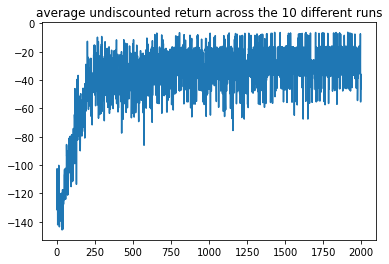

In [9]:
returns_total_avg = np.average(returns_total, axis=0)
plt.plot(returns_total_avg)
plt.title("average undiscounted return across the 10 different runs")

plt.show()

### 1.2.b

In [ ]:
episodes = generate_episode(policy_total[6], env, True)


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


### 1.2.c

In [11]:
last_episodes = []
for i in range(10):
    last_episodes.append(np.average(returns_total [i][-100:]))
print(f" average undiscounted return last 100 episodes over 10 runs is:{np.average(last_episodes)}")

 average undiscounted return last 100 episodes over 10 runs is:-27.25


In [13]:
policy_total = []
returns_total = np.zeros((10, 10000))
for i in range(10):
  policy, returns_total[i,:] = soft_policy_mc(episodes_n = 10000, env = env, gamma = 0.99, epsilon = 0.05)
  policy_total.append(policy)

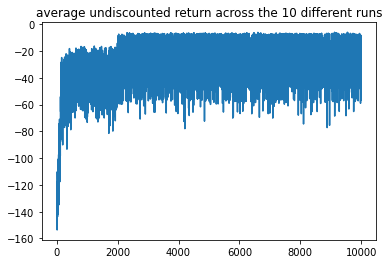

In [14]:
returns_total_avg = np.average(returns_total, axis=0)
plt.plot(returns_total_avg)
plt.title("average undiscounted return across the 10 different runs")

plt.show()

In [16]:
last_episodes = []
for i in range(10):
    last_episodes.append(np.average(returns_total [i][-100:]))
print(f" average undiscounted return last 100 episodes over 10 runs is:{np.average(last_episodes)}")

 average undiscounted return last 100 episodes over 10 runs is:-26.423000000000002


### 1.3

In [18]:
def mc_ordinary(policy, b, num_episodes, gamma):

    V = np.zeros(16)
    Q = np.zeros((16,4))

    C = np.zeros((16))
    V_hist = np.zeros((2000, 16))
    #returns_count = defaultdict(float)

    # YOUR CODE HERE
    for i in range(num_episodes):
        
        episodes = generate_episode(b, env, False)
        
        G = 0.0
        W = 1.0
        for t, sar  in enumerate(episodes[::-1]):
            G = gamma * G + sar[2]
            C[sar[0]] = C[sar[0]] + 1
            V[sar[0]] = V[sar[0]] + 1 / C[sar[0]] * W * (G - V[sar[0]])

            #Q[[sar[0], sar[1]]] = Q[sar[0], sar[1]] + 1 / C[sar[0], sar[1]] * W * (G - Q[sar[0], sar[1]])
            #for a in range(env.action_space.n):

              #V[sar[0]] += policy[sar[0],a] * V[sar[0]] 

            W *= policy[sar[0], sar[1]]/ b[sar[0], sar[1]]
            if W == 0:
              break

        V_hist[i,:] = V.copy()
    return V, V_hist



In [19]:
def mc_weighted(policy, b, num_episodes, gamma):

    # Keeps track of current V and count of returns for each state
    # to calculate an update.
    V = np.zeros(16)
    #V = defaultdict(float)

    C = np.zeros((16))
    V_hist = np.zeros((2000, 16))
    #returns_count = defaultdict(float)

    # YOUR CODE HERE
    for i in range(num_episodes):
        
        episodes = generate_episode(b, env, False)
        
        G = 0.0
        W = 1.0
        for t, sar  in enumerate(episodes[::-1]):
            G = gamma *G + sar[2]
            C[sar[0]] = C[sar[0]] + W
            V[sar[0]] = V[sar[0]] + (W / C[sar[0]]) * (G - V[sar[0]])

            W = W * policy[sar[0], sar[1]] / b[sar[0], sar[1]]
            if W == 0:
              break

        V_hist[i,:] = V.copy()
    return V, V_hist



In [27]:
b = 1/4 * np.ones((16,4))

In [28]:
def v_s(s):
  V_hist_s = np.zeros((100, 2000))
  V_hist_ordinary_s = np.zeros((100, 2000))
  for i in range(100):
    V, V_hist = mc_weighted(policy_total[6], b, 2000, 0.99)
    V_ordinary, V_hist_ordinary = mc_ordinary(policy_total[6], b, 2000, 0.99)
    V_hist_s[i,:] = V_hist[:,s]
    V_hist_ordinary_s [i,:] = V_hist_ordinary[:,s]
  
  return V_hist_s, V_hist_ordinary_s



In [29]:
def plot_many(experiments, label, color):
            mean_exp = np.mean(experiments, axis=0)
            std_exp = np.std(experiments, axis=0)
            plt.plot(mean_exp, color=color, label=label)
            plt.fill_between(range(len(experiments[0])), mean_exp + std_exp,
                mean_exp - std_exp, color=color, alpha=0.1)

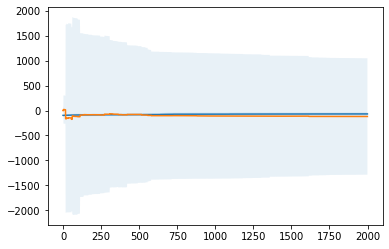

In [32]:
V_hist_s_0_weighted, V_hist_s_0_ordinary = v_s(0)
plot_many(V_hist_s_0_weighted, "weighted", None)
plot_many(V_hist_s_0_ordinary, "ordinary", None)


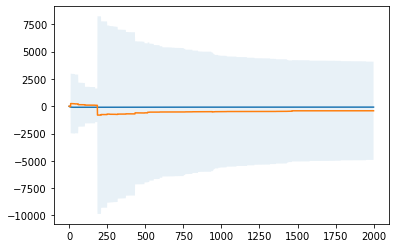

In [31]:
V_hist_s_3_weighted, V_hist_s_3_ordinary = v_s(3)
plot_many(V_hist_s_3_weighted, "weighted", color=None)
plot_many(V_hist_s_3_ordinary, "ordinary", color=None)


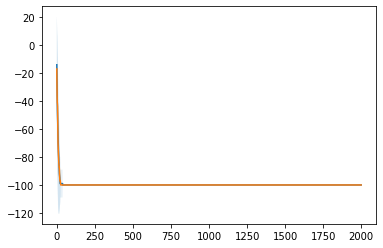

In [ ]:
V_hist_s_7_weighted, V_hist_s_7_ordinary = v_s(7)
plot_many(V_hist_s_7_weighted, label="weighted", color=None)
plot_many(V_hist_s_7_ordinary, label="ordinary", color=None)


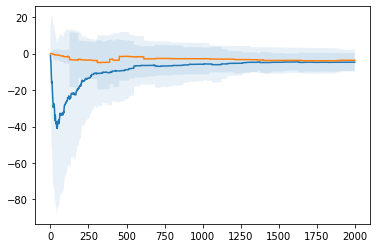

In [ ]:
V_hist_s_14_weighted, V_hist_s_14_ordinary = v_s(14)
plot_many(V_hist_s_14_weighted, label="weighted", color=None)
plot_many(V_hist_s_14_ordinary, label="ordinary", color=None)
